# Demonstrate convolution and filters

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

root_notebook_folder = os.path.abspath('.')
data_folder = os.path.abspath('./local_data')


## Convolution
Image

$\large image = \begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 6\\
7 & 8 & 9 & 10 & 11 & 12 \\
13 & 14 & \color{red}{\text{15}} & \color{red}{\text{16}} & \color{red}{\text{17}} & 18 \\
19 & 20 & \color{red}{\text{21}} & \color{red}{\text{22}} & \color{red}{\text{23}} & 24 \\
25 & 26 & \color{red}{\text{27}} & \color{red}{\text{28}} & \color{red}{\text{29}} & 30 \\
31 & 32 & 33 & 34 & 35 & 36
\end{bmatrix}$

$\large Kernel = \begin{bmatrix} 0.1 & 0.2 & 0.3\\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{bmatrix}$
<p style="text-align:center;">
$\large
image * Kernel [4,4] = \\ 
0.9 \cdot 15 + 0.8 \cdot 16 + 0.7 \cdot 17 + \\
0.6 \cdot 21 + 0.5 \cdot 22 + 0.4 \cdot 23 + \\
0.3 \cdot 27 + 0.2 \cdot 28 + 0.1 \cdot 29 = \\
87.6
$
</p>

Note that unlike ML libraries (pytorch and TF), numpy implements cross-correlation (reverses filter). 


In [2]:
0.9*15+0.8*16+0.7*17+0.6*21+0.5*22+0.4*23+0.3*27+0.2*28+0.1*29

87.6

In [3]:
image = np.arange(1, 37).reshape( (6,6))
image

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]])

In [4]:
filters = np.linspace(0.1, 0.9, 9).reshape( (3,3))
filters

array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6],
       [0.7, 0.8, 0.9]])

In [5]:
from scipy.signal import convolve2d
c = convolve2d(in1=image , in2=filters, mode='valid' )
c

array([[ 24.6,  29.1,  33.6,  38.1],
       [ 51.6,  56.1,  60.6,  65.1],
       [ 78.6,  83.1,  87.6,  92.1],
       [105.6, 110.1, 114.6, 119.1]])

In [6]:
from scipy.signal import convolve2d
filters = np.ones( shape=(3,3) ) 
inputs = np.ones( shape=(5,5)  )# H x W x Channels 
convolve2d(in1=inputs , in2=filters, mode='same' ) # modestr {‘full’, ‘valid’, ‘same’}

array([[4., 6., 6., 6., 4.],
       [6., 9., 9., 9., 6.],
       [6., 9., 9., 9., 6.],
       [6., 9., 9., 9., 6.],
       [4., 6., 6., 6., 4.]])

In [7]:
convolve2d(in1=inputs , in2=filters, mode='same' )

array([[4., 6., 6., 6., 4.],
       [6., 9., 9., 9., 6.],
       [6., 9., 9., 9., 6.],
       [6., 9., 9., 9., 6.],
       [4., 6., 6., 6., 4.]])

## Generate synthetic image

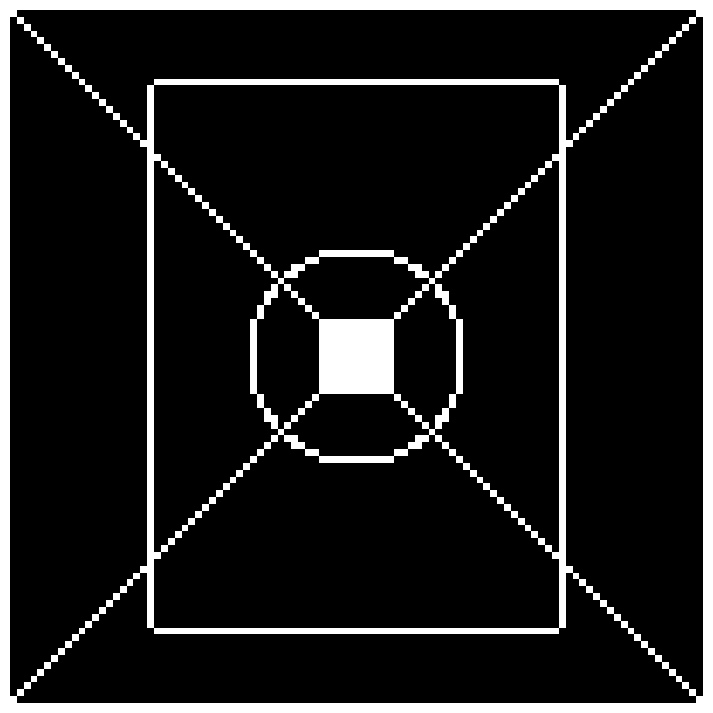

In [8]:
H, W = 101, 101
image = np.zeros( (H,W), dtype=np.float32)
w,h = np.meshgrid( np.linspace(-(H-1)/2,(H-1)/2,H), np.linspace(-(W-1)/2,(W-1)/2,W))
#"draw" pattern
image[ (w==+30) & (h>-40) & (h<40)]=1 # horizontal line
image[ (w==-30) & (h>-40) & (h<40)]=1 # horizontal line

image[ (w>-30) & (w<30) & (h==-40) ]=1 # vertical line
image[ (w>-30) & (w<30) & (h==40) ]=1 # vertical line

image[ ((w**2+h**2)>=15**2) & ((w**2+h**2)<=15.9**2) ] = 1 # draw circle

image[ w==h ] = 1 # draw diagonal
image[ w==-h ] = 1 # draw diagonal

image[ (w>=-5) & (w<=5) & (h>=-5) & (h<=5)  ] =1

plt.figure(figsize=(9,9))
plt.imshow(image, cmap='gray'); plt.axis('off');

## Load regular image

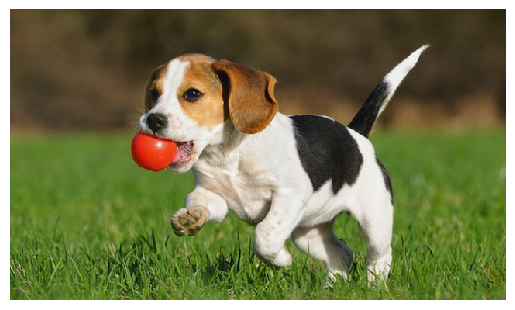

image matrix size:  (375, 640)

 First 6 columns and rows of the image matrix: 
 [[72. 72. 73. 74. 75. 75.]
 [73. 73. 74. 74. 75. 75.]
 [73. 74. 74. 74. 75. 75.]
 [74. 74. 74. 74. 74. 74.]
 [74. 74. 74. 74. 74. 74.]
 [73. 73. 73. 73. 73. 74.]]


(-0.5, 639.5, 374.5, -0.5)

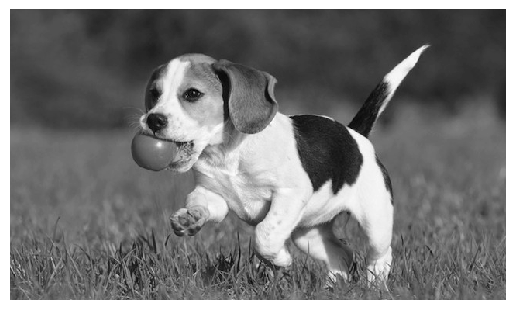

In [9]:
from PIL import Image 
import numpy as np
from matplotlib import pyplot as plt

rgb_img = Image.open('what-does-it-mean-when-cat-wags-tail.jpg')
rgb_img = Image.open('doggy-day-care-gallery-1-640x375.jpg')
plt.figure()
plt.imshow(rgb_img, interpolation='nearest',cmap='gray')
plt.axis('off')
plt.show()

plt.figure()
img_bw = rgb_img.convert(mode="L")
img_bw = np.array(img_bw)/255
print('image matrix size: ', img_bw.shape)      # print the size of image
print('\n First 6 columns and rows of the image matrix: \n', img_bw[:6,:6]*255) 
plt.imshow(img_bw, interpolation='nearest',cmap='gray')
plt.axis('off')

In [10]:
def test_filter(image, filter_matrix): 
    from scipy.signal import convolve2d
    # Image: Batch Size х Channels x H x W
    return convolve2d(image, filter_matrix, mode='same', boundary='fill')

In [11]:
def test_image_with_plot(image, filter_matrix):
    convolved_image = test_filter(image, filter_matrix).squeeze()
    print('filter:\n', filter_matrix)
    plt.figure(figsize=(7,7))
    plt.imshow(convolved_image, cmap='gray'); plt.axis('off');
    return convolved_image

filter:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
filter:
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


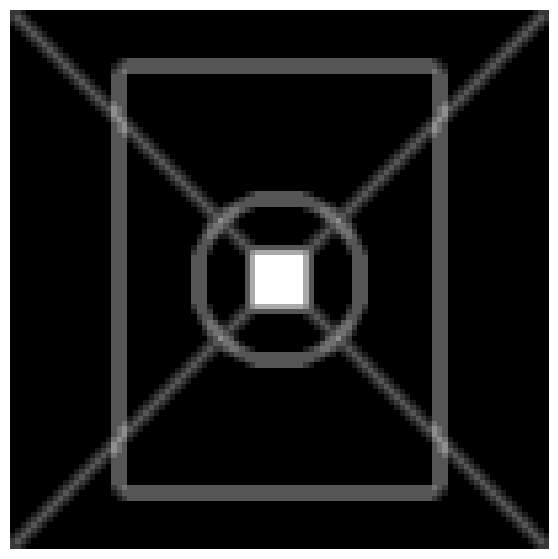

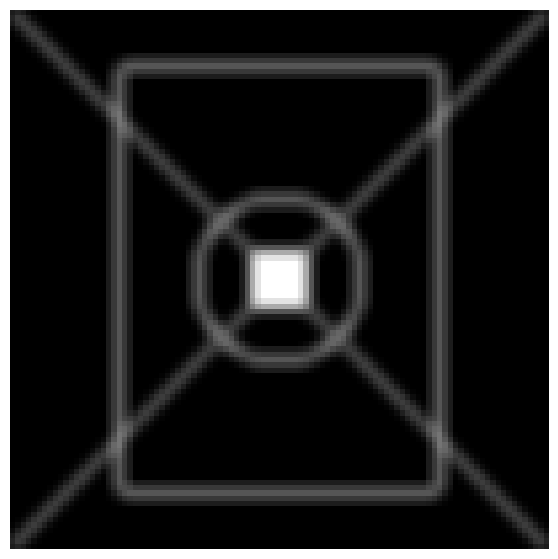

In [12]:
filter_matrix = np.ones( (3,3) )
image1 = test_image_with_plot(image, filter_matrix);
test_image_with_plot(image1, filter_matrix);

filter:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


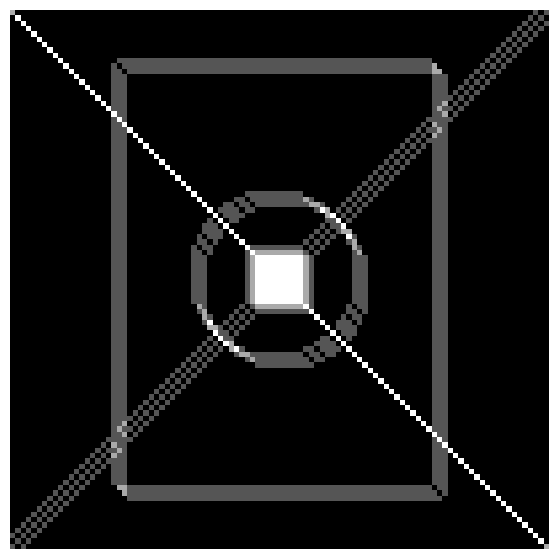

In [13]:
filter_matrix = np.eye( 3 )
test_image_with_plot(image, filter_matrix);

filter:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


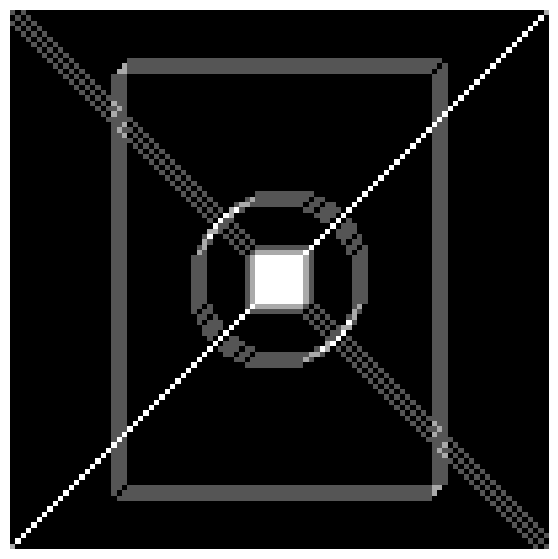

In [14]:
filter_matrix = np.rot90(np.eye(3))
test_image_with_plot(image, filter_matrix);

filter:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
filter:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


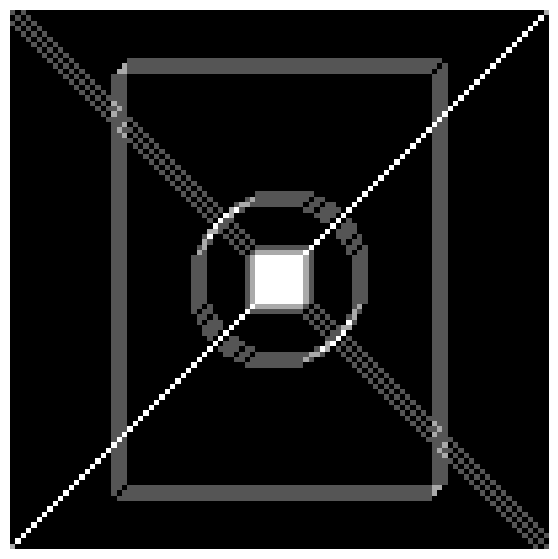

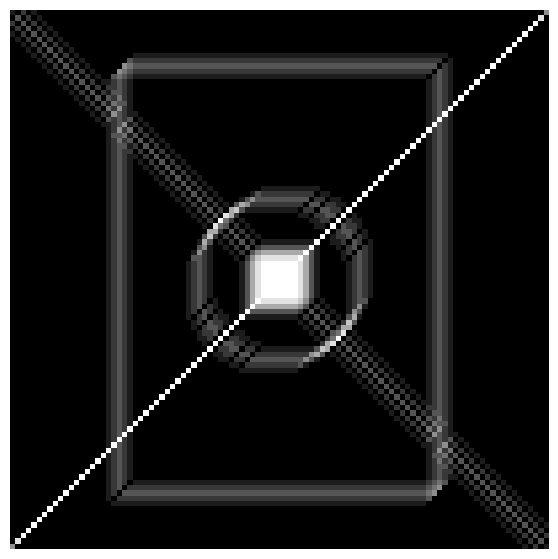

In [15]:
filter_matrix = np.rot90(np.eye(3))
im1 = test_image_with_plot(image, filter_matrix)
test_image_with_plot(im1, filter_matrix);

filter:
 [[0.5 0.  0.5]
 [0.  1.  0. ]
 [0.5 0.  0.5]]
filter:
 [[0.5 0.  0.5]
 [0.  1.  0. ]
 [0.5 0.  0.5]]


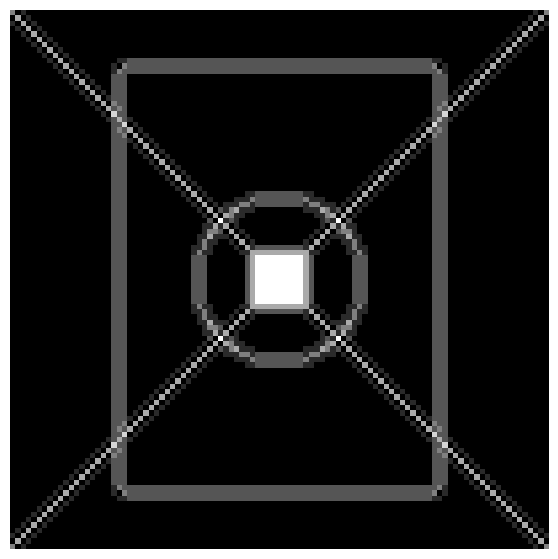

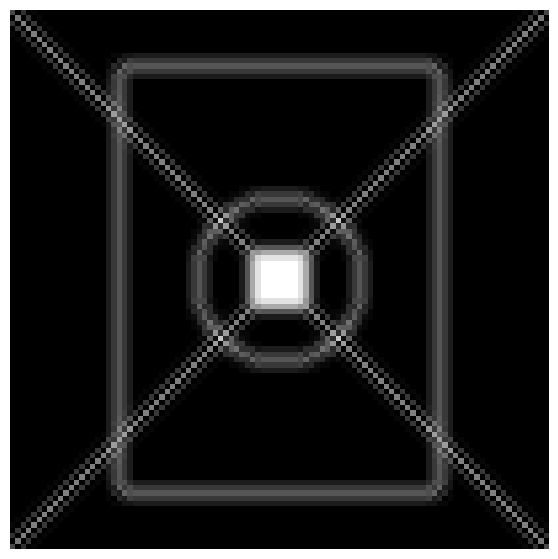

In [16]:
filter_matrix = (np.eye(3) + np.rot90(np.eye(3)))/2
output = test_image_with_plot(image, filter_matrix)
test_image_with_plot(output, filter_matrix);

### Edge detection

filter:
 [[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


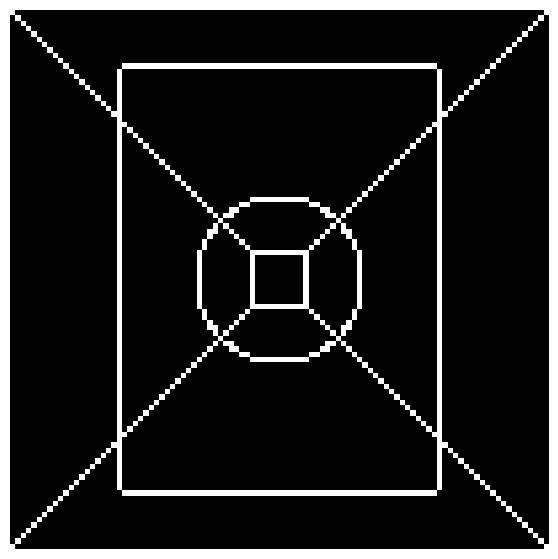

In [17]:
filter_matrix = np.array([[ 0, -1, 0], [-1, 4, -1 ],[ 0, -1, 0]], dtype=np.float32)
output = test_image_with_plot(image, filter_matrix)
plt.imshow(output>0, cmap='gray')

filter:
 [[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


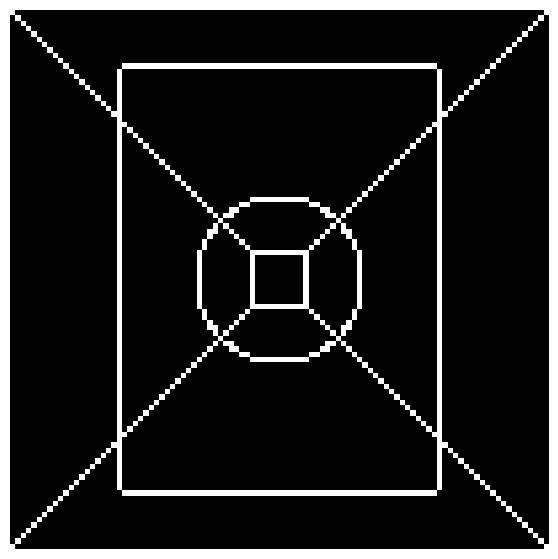

In [18]:
filter_matrix = -np.ones( (3,3), dtype=np.float32)
filter_matrix[1,1] = 8
output = test_image_with_plot(image, filter_matrix)
plt.imshow(output>0, cmap='gray')

### Vertical Edge detection

filter:
 [[-1.  2. -1.]
 [-1.  2. -1.]
 [-1.  2. -1.]]


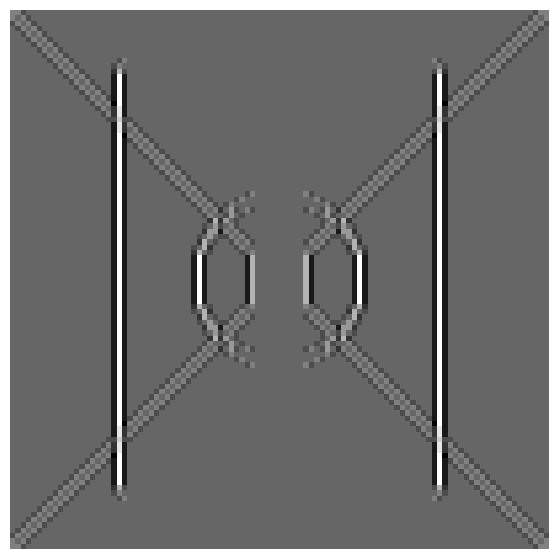

In [19]:
filter_matrix = np.array([[ -1, 2, -1], [-1, 2, -1 ],[ -1, 2, -1]], dtype=np.float32)
output = test_image_with_plot(image, filter_matrix)
plt.imshow(output, cmap='gray')

### Horizontal edge detection

filter:
 [[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]


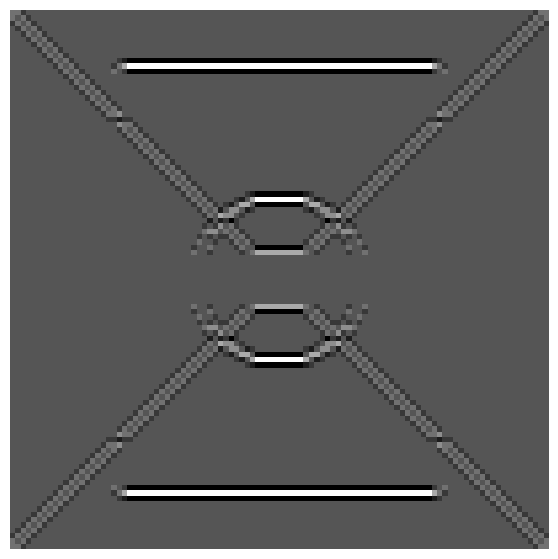

In [20]:
filter_matrix = np.array([[ -1, -1, -1], [2, 2, 2 ],[ -1, -1, -1]], dtype=np.float32)
output = test_image_with_plot(image, filter_matrix)
plt.imshow(output, cmap='gray')

### Sharpen filter

filter:
 [[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


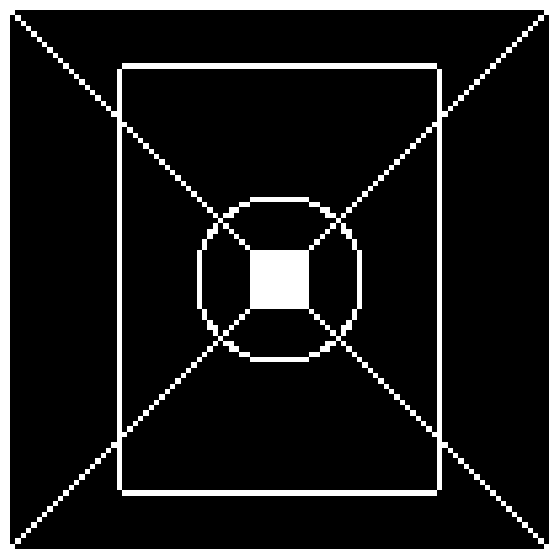

In [21]:
filter_matrix = np.array([[ 0, -1, 0], [-1, 5, -1 ],[ 0, -1, 0]], dtype=np.float32)
output = test_image_with_plot(image, filter_matrix)
plt.imshow(output>0, cmap='gray')

### Blure & sharpen

filter:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
filter:
 [[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


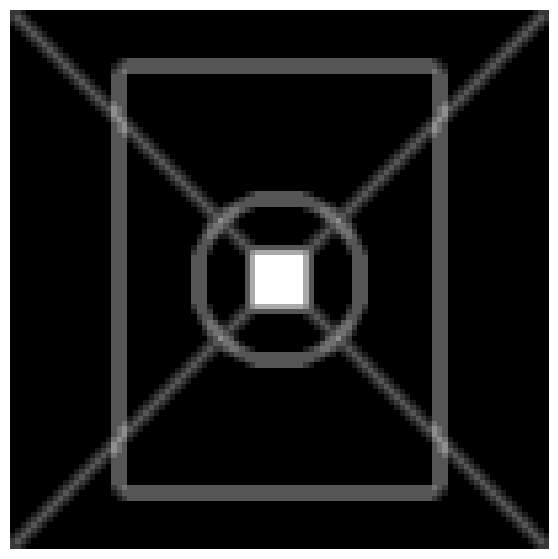

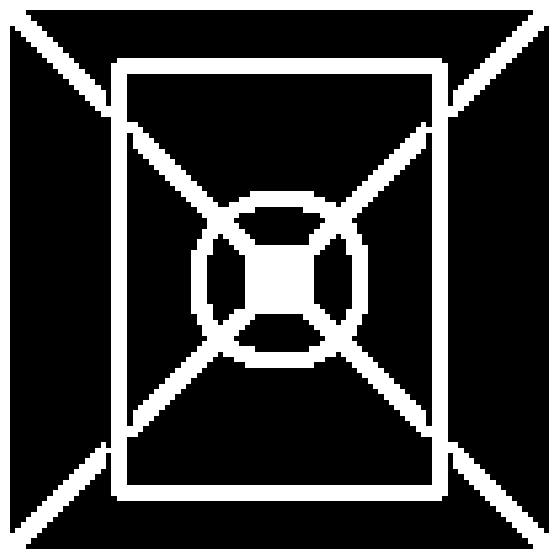

In [22]:
filter_matrix = np.ones( (3,3), dtype=np.float32)/9
output = test_image_with_plot(image, filter_matrix)

filter_matrix = np.array([[ 0, -1, 0], [-1, 5, -1 ],[ 0, -1, 0]], dtype=np.float32)
output = test_image_with_plot(output, filter_matrix)
plt.imshow(output>0, cmap='gray')

In [23]:
filters = np.ones( (3,3) )
inputs = np.eye(5)  

inputs, convolve2d(inputs, filters,boundary='fill')

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 0., 0.],
        [1., 2., 2., 1., 0., 0., 0.],
        [1., 2., 3., 2., 1., 0., 0.],
        [0., 1., 2., 3., 2., 1., 0.],
        [0., 0., 1., 2., 3., 2., 1.],
        [0., 0., 0., 1., 2., 2., 1.],
        [0., 0., 0., 0., 1., 1., 1.]]))

## test different filters

In [24]:
FilterLib = {
    'blur': np.ones( (3,3), dtype=np.float32)/9,
    'gaussian blur': np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16,
    'edge detection (laplacian)': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),    
    'detect vertical line': np.array([[1, -2, 1],[1, -2, 1], [1, -2, 1]]),
    'detect horizontal line': np.array([[1, 1, 1],[-2, -2, -2], [1, 1, 1]]),    
    'detect vertical line (Sobel) - less noise': np.array([[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]]),
    'detect horizontal line (Sobel) - less noise': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'detect diagonal 1': np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]]),
    'detect diagonal 2': np.array([[-2, -1, 0],[-1, 0, 1], [0, 1, 2]]),
    
}

In [25]:
def apply_filters(img, FilterLib):
    from IPython.display import HTML, display, Math
    for filter_name, filter_matrix in FilterLib.items():
        display(HTML(f"<h1>Filter: {filter_name}</h1>"))
        filter_matrix = filter_matrix.reshape(-1, filter_matrix.shape[-2], filter_matrix.shape[-1])
        for filter_index, current_filter_matrix in enumerate(filter_matrix): 
            table_str = r"$\large \begin{bmatrix} " 
            for i in range(len(current_filter_matrix)):
                for j in range(len(current_filter_matrix[i])):
                    table_str += f"{current_filter_matrix[i][j]:0.4f}"
                    if j < len(current_filter_matrix[i])-1:
                        table_str+=' & '
                if i <len(current_filter_matrix)-1:
                    table_str += r'\\'
            table_str += r"\end{bmatrix}$"

            display(Math(table_str))

            output = convolve2d(img , current_filter_matrix.astype(np.float32),fillvalue=0, boundary='fill',mode='same' )
            fig, ax = plt.subplots(1,1, figsize=(7,7))
            plt.imshow(output, cmap='gray'); plt.axis('off');plt.title(f"{filter_index}. {filter_name}"); plt.draw();
            #ax[0].text(0,0, str(current_filter_matrix.numpy())); plt.axis('off');    
            fig.canvas.draw()

### Test synthetic image

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

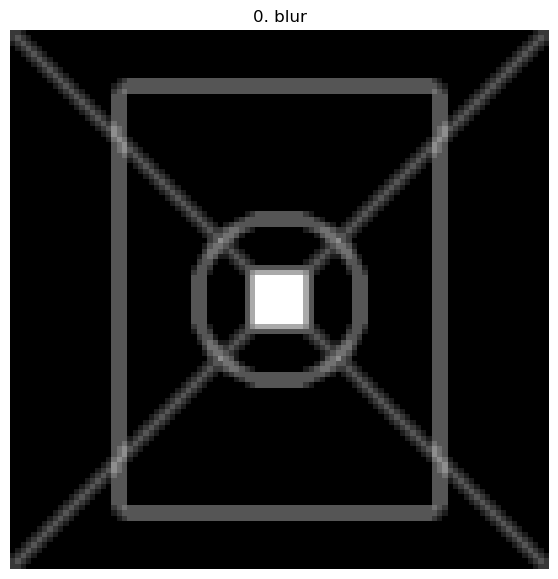

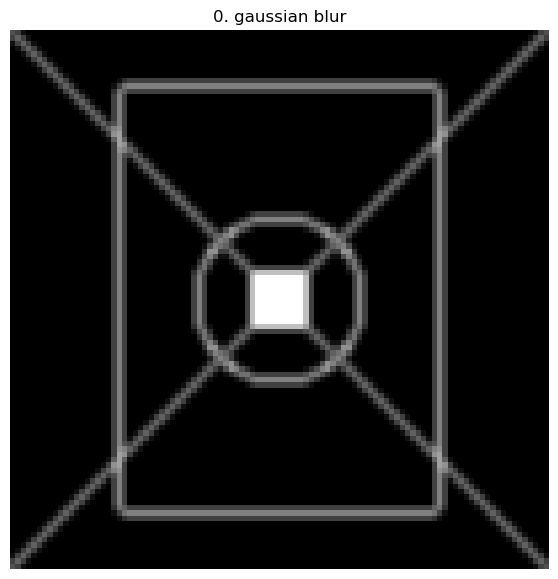

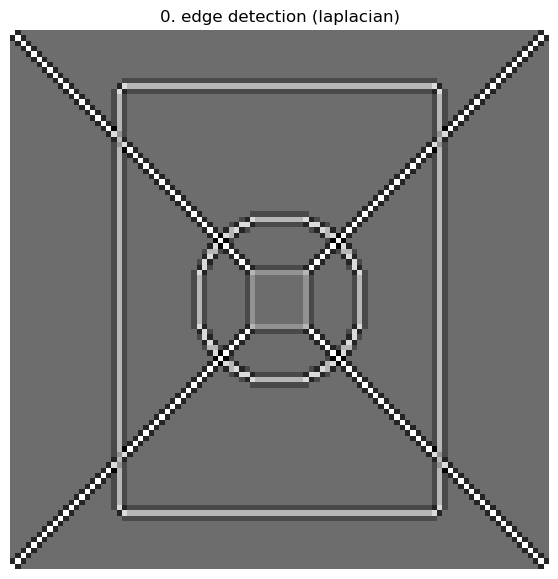

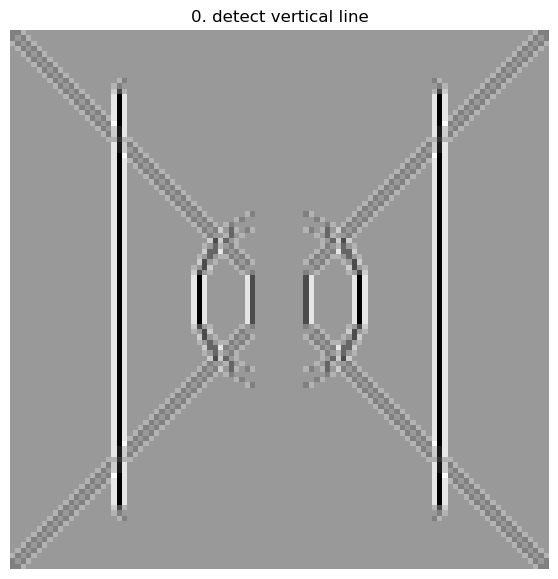

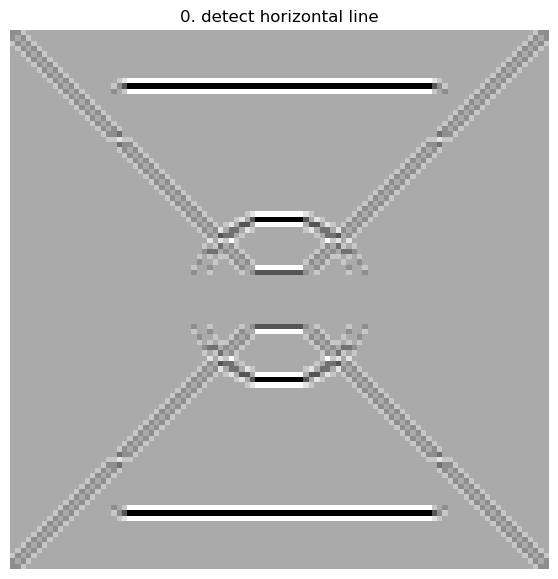

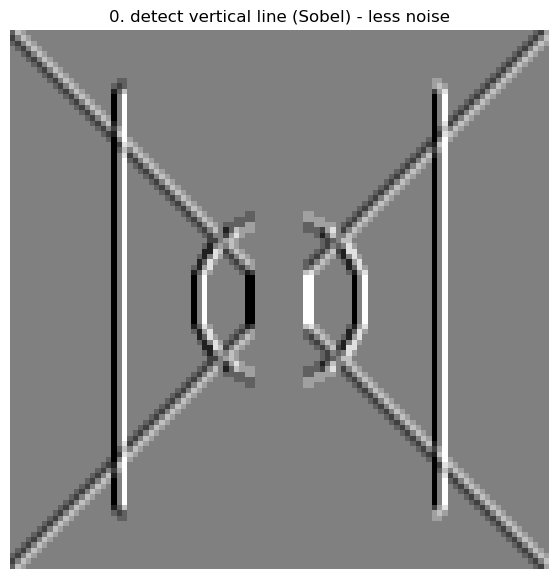

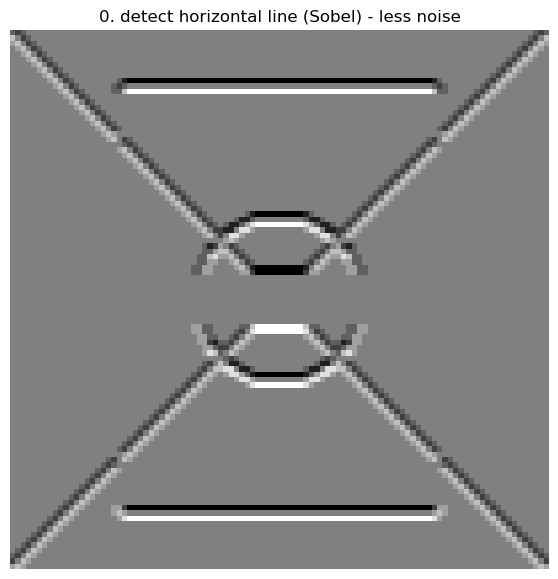

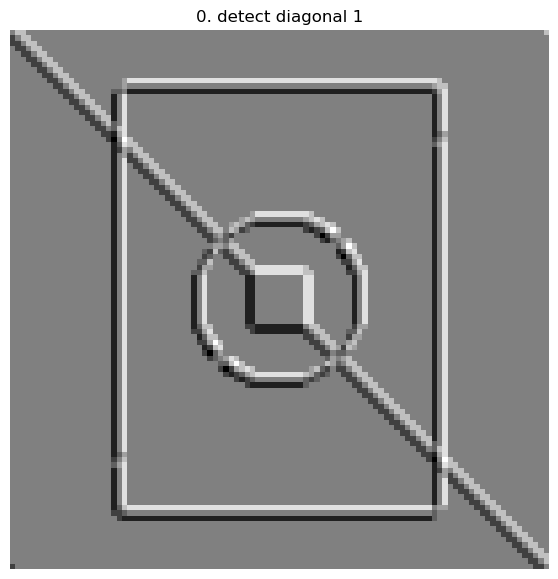

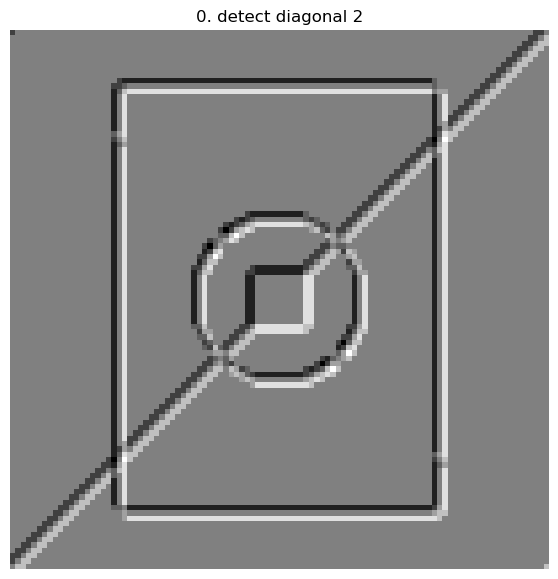

In [26]:
apply_filters(image, FilterLib)

### test image

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

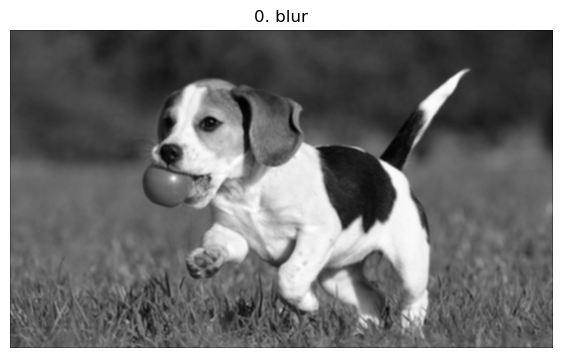

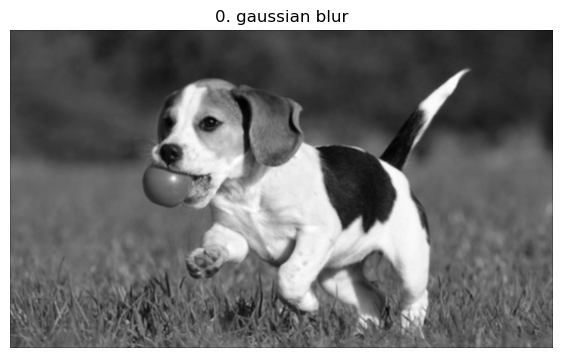

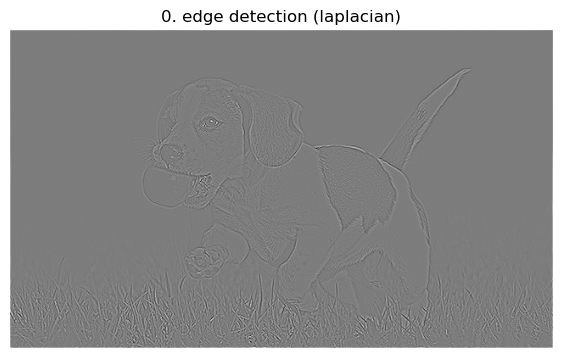

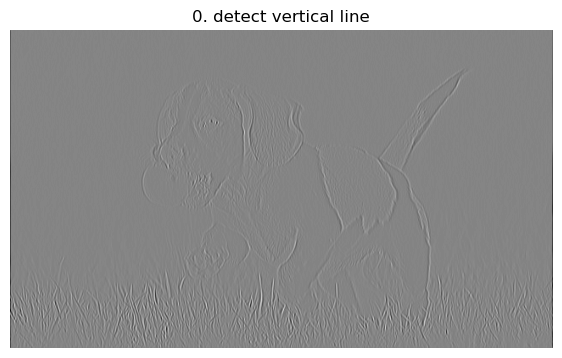

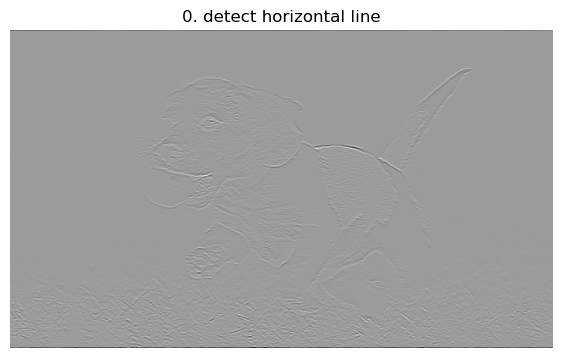

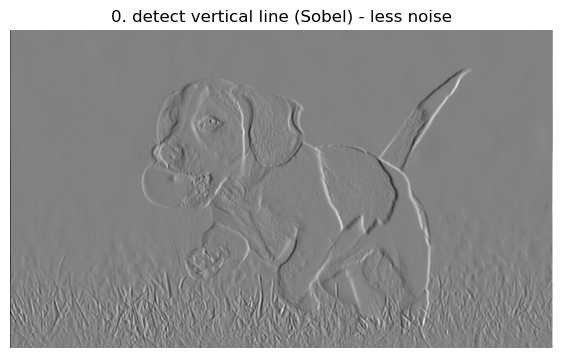

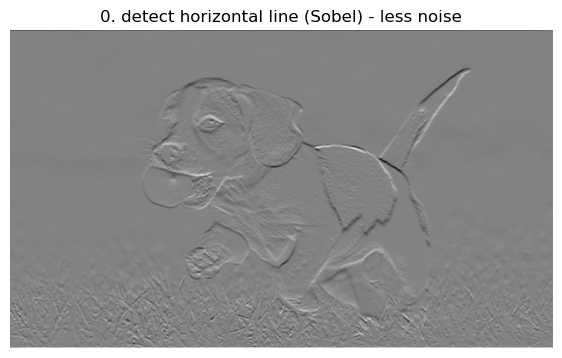

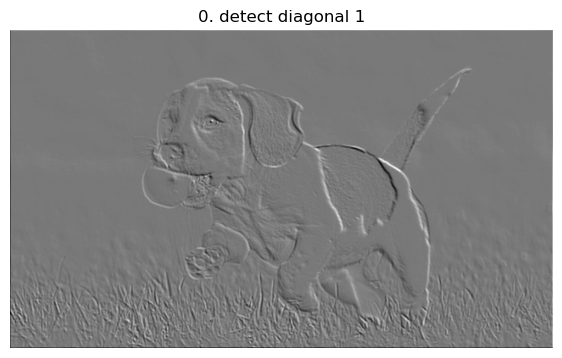

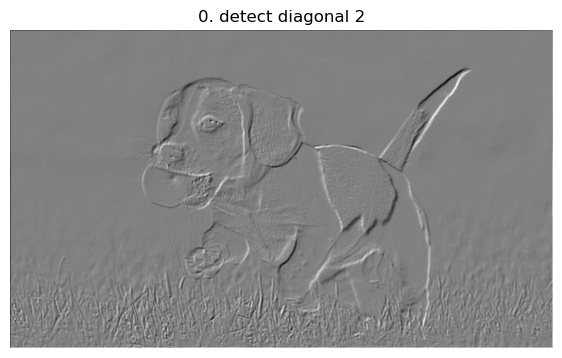

In [27]:
apply_filters(img_bw, FilterLib)

## Convolution: Edges

In [28]:
inputs, convolve2d(inputs, filters)

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 1., 1., 0., 0., 0., 0.],
        [1., 2., 2., 1., 0., 0., 0.],
        [1., 2., 3., 2., 1., 0., 0.],
        [0., 1., 2., 3., 2., 1., 0.],
        [0., 0., 1., 2., 3., 2., 1.],
        [0., 0., 0., 1., 2., 2., 1.],
        [0., 0., 0., 0., 1., 1., 1.]]))